C:\Users\turne\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X. Shape:  (26, 2)


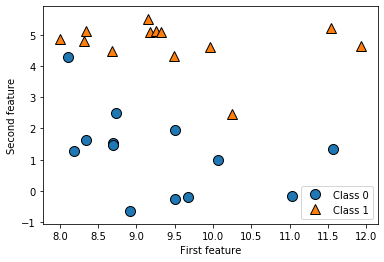

In [5]:
# Time to generate some datasets
import mglearn # Feel free to look at the mglearn module if you'd like to see what code is being used!
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['Class 0','Class 1'], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print('X. Shape: ', X.shape)

Text(0, 0.5, 'Target')

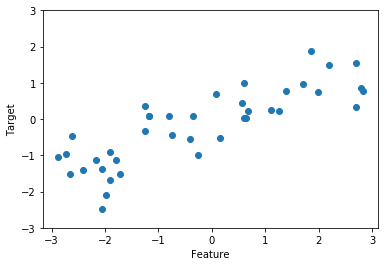

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [15]:
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()
print("Cancer keys:\t\t\t",cancer.keys())
print("Shape of cancer data:\t\t",cancer['data'].shape)
print("Sample counts per class:\t",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print("\nFeature Names:\n",cancer['feature_names'])

# This will be our real-world classification data!

Cancer keys:			 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data:		 (569, 30)
Sample counts per class:	 {'malignant': 212, 'benign': 357}

Feature Names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
# This will be or real-world regression data!

from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:\t",boston['data'].shape)

Data shape:	 (506, 13)


In [18]:
# This will be used for feature engineering
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:",X.shape)

X.shape: (506, 104)


C:\Users\turne\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


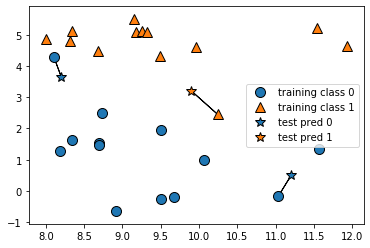

In [24]:
# The K-Nearest Neighbors (KNN) only consists of storing the training dataset.  To make a prediction for a new data point, the
# algorithm finds the (K) closest data point(s) in the training dataset. 

mglearn.plots.plot_knn_classification(n_neighbors=1)

# The stars below denote the new test points, and the lines denote their nearest neighbors.

C:\Users\turne\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


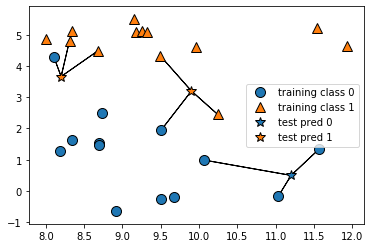

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
#Check out the changes.

In [32]:
# Let's apply this using sci-kit learn
from sklearn.model_selection import train_test_split # This will split our data into train/test arrays
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) #Random_state essentially sets a seed (?)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) #Assign the algorithm to a variable

clf.fit(X_train,y_train) #Fit your training data to the algorithm.  This will be used when called for following tests.

print("Test set predictions:", clf.predict(X_test)) #Use .predict to call the actual prediction values
print("Test set accuracy:",clf.score(X_test,y_test).round(2)) #Use .score to get the percentage.  The second arg (y_test) are the answers.


Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


C:\Users\turne\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


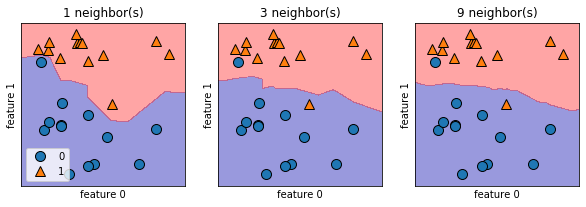

In [37]:
# We can use the mglearn functions to display the decision boundaries for our data

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

# In this example, the more neighbors yields a smoother boundary line, but is less accurate.

In [38]:
# Let's investigate whether we can confirm the connection between model complexity and generalization.
